In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe

In [2]:
zcta_url = "https://www2.census.gov/geo/tiger/TIGER2023/ZCTA520/tl_2023_us_zcta520.zip"
zctas = gpd.read_file(zcta_url)

In [3]:
zctas = zctas.rename(columns={'ZCTA5CE20': 'ZIP'})
zctas['ZIP'] = zctas['ZIP'].astype(str).str.zfill(5)

In [4]:
zctas.head()

,ZIP,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,860Z200US47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72794 39.156..."
1,47870,47870,860Z200US47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,860Z200US47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.57450, -87.24711 39.574..."
3,47337,47337,860Z200US47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,860Z200US47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


In [5]:
zip_afford = pd.read_csv('Data/zip_affordability_2020_2023.csv')
zip_afford['ZIP'] = zip_afford['ZIP'].astype(str).str.zfill(5)

In [6]:
zip_afford

,ZIP,Price_2020,2021,2022,Price_2023,Income_2020,Income_2023,Ratio_2020,Ratio_2023,Affordability_Change_%
0,37013,276900.0,329637.5,392500.0,385000.0,60602.0,72233.0,4.569156,5.329974,16.651164
1,37015,102000.0,95750.0,278750.0,250000.0,59144.0,74848.0,1.724604,3.340103,93.673557
2,37027,445000.0,540000.0,600000.0,620000.0,133254.0,156002.0,3.339487,3.974308,19.009537
3,37072,269935.0,310245.0,350137.0,365331.0,62655.0,75514.0,4.308275,4.837924,12.293750
4,37076,326960.0,361514.5,429900.0,415500.0,64392.0,74555.0,5.077649,5.573067,9.756827
5,37080,270000.0,362845.0,389900.0,400000.0,63201.0,78151.0,4.272084,5.118297,19.807950
6,37115,244500.0,300000.0,350000.0,338000.0,46777.0,53034.0,5.226928,6.373270,21.931472
7,37122,385000.0,489596.0,560000.0,608730.0,92944.0,109306.0,4.142279,5.569045,34.443972
8,37135,365037.5,416250.0,502100.0,499500.0,128281.0,146028.0,2.845608,3.420577,20.205464
9,37138,263000.0,300476.0,365000.0,356500.0,73710.0,87450.0,3.568037,4.076615,14.253729


In [7]:
zctas_nash = zctas[zctas['ZIP'].isin(zip_afford['ZIP'])].copy()

In [8]:
map_df = zctas_nash.merge(zip_afford[['ZIP', 'Affordability_Change_%']],on='ZIP',how='left')

In [9]:
map_df.head()

,ZIP,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Affordability_Change_%
0,37206,37206,860Z200US37206,B5,G6350,S,20074192,487985,+36.1793189,-086.7310828,"POLYGON ((-86.77081 36.17450, -86.77000 36.174...",7.927340
1,37072,37072,860Z200US37072,B5,G6350,S,200858819,514147,+36.3521400,-086.7466508,"POLYGON ((-86.89059 36.38706, -86.89037 36.387...",12.293750
2,37203,37203,860Z200US37203,B5,G6350,S,10863669,8826,+36.1497755,-086.7891460,"POLYGON ((-86.82282 36.14095, -86.82281 36.141...",20.055577
3,37211,37211,860Z200US37211,B5,G6350,S,56268797,0,+36.0670172,-086.7234193,"POLYGON ((-86.76583 36.11993, -86.76583 36.119...",15.659042
4,37143,37143,860Z200US37143,B5,G6350,S,85815677,68803,+36.1225294,-087.0271335,"POLYGON ((-87.09039 36.08632, -87.09026 36.086...",-25.877192


In [10]:
gdf = map_df.dropna(subset=['Affordability_Change_%']).copy()

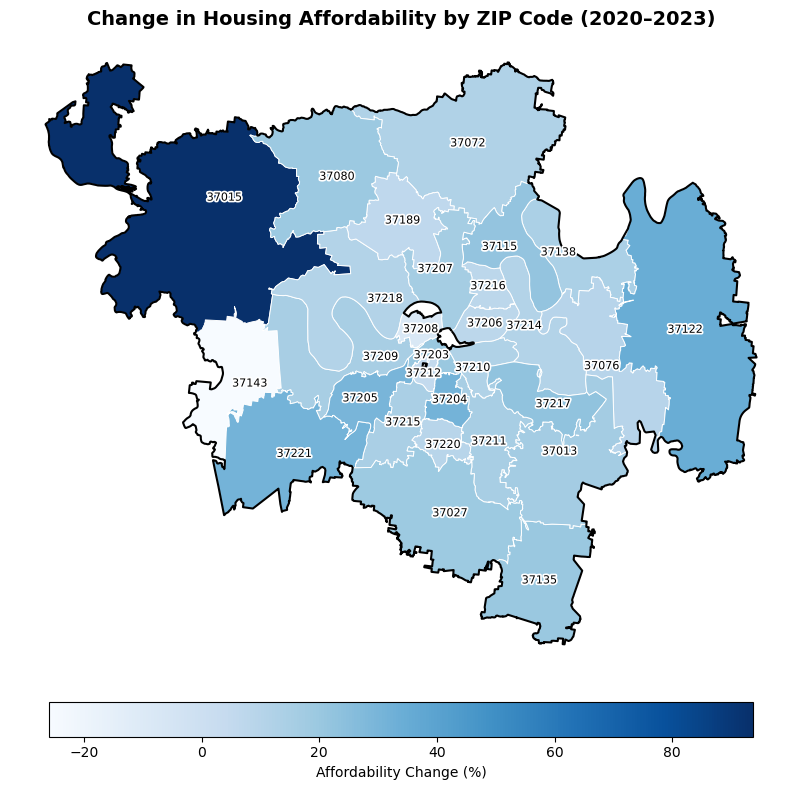

In [11]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.set_facecolor('#F2F2F2')
fig.patch.set_facecolor('white')
gdf.plot(column='Affordability_Change_%',cmap='Blues',linewidth=0.7,edgecolor='white',ax=ax)
gdf.dissolve().boundary.plot(ax=ax,color='black',linewidth=1.5)
ax.set_title('Change in Housing Affordability by ZIP Code (2020–2023)',fontsize=14,fontweight='bold')
ax.axis('off')
for _, row in gdf.iterrows():
    point = row.geometry.representative_point()
    ax.text(point.x,point.y,str(row['ZIP']),fontsize=8,ha='center',va='center',color='black',path_effects=[pe.withStroke(linewidth=2.5, foreground='white')])
sm = mpl.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=gdf['Affordability_Change_%'].min(),vmax=gdf['Affordability_Change_%'].max()))
sm.set_array([])
cbar = fig.colorbar(sm,ax=ax,orientation='horizontal',fraction=0.05,pad=0.04)
cbar.set_label('Affordability Change (%)')
plt.tight_layout()
plt.show()